# Reonic Takehome Submission - Written By: Lucas Ion

## Task 1: Logic

Total Energy Consumed (kWh): 112315.5
Theoretical Maximum Power Demand (kW): 220
Actual Maximum Power Demand (kW): 88.0
Concurrency Factor: 0.4


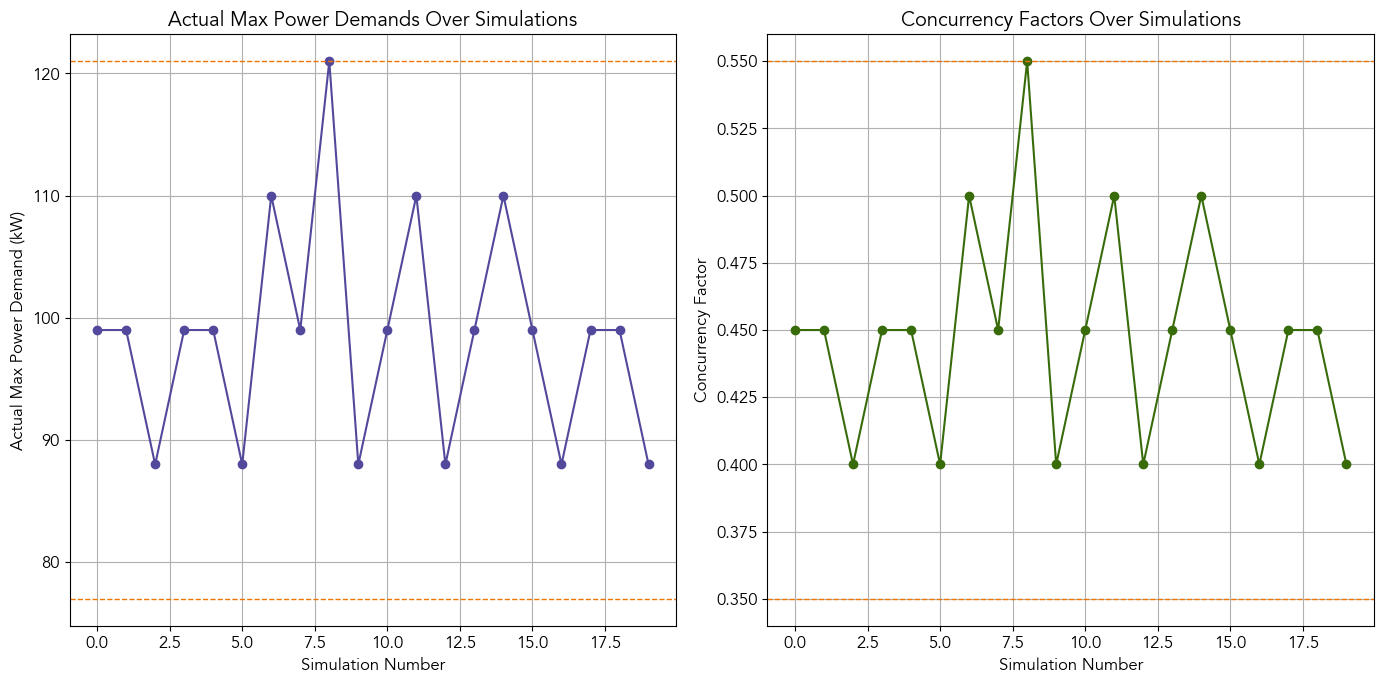

In [15]:
# Overview:
# The program below uses the values as defined in Task 1. It first begins by taking the probabilites in T1 and expanding them
# to be able to span over increments of 15 (since there are 4 segments of 15 in an hour) we expand the arrival probabilities by 4.
# I then took the values of T2 and performed a conversion to kWh to allow me to perform the correct power demand calculations
# I use the power_demand to calculate the actual max power demand and the total energy cosumed giving me the ability to calculate the 
# required subequent values for the task.

# The program iterates over every tick, and finds the "time in day" by perfoming the modulo operation, it then uses the random method
# in NumPy to see if a car "arrives". If it does, a random energy demand is also generated based on the probabilities of T2 and the subsequent chargepoint gets a charging time
# if the chargepoint is not free the power demand is updaed, and once the charging is "complete", the charger is free for allocation again.
# This happends for every charge point for every tick

import numpy as np
import matplotlib.pyplot as plt

def run_simulation(num_chargepoints=20, intervals=35040, charging_speed=11, km_to_kwh_conversion=0.18, arrival_probabilities_per_hour=None, charging_demands_km=None, charging_probabilities=None):
    # Default values for arrival probabilities if not changed
    if arrival_probabilities_per_hour is None:
        arrival_probabilities_per_hour = np.array([
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0283, 0.0283, 0.0566, 0.0566,
            0.0566, 0.0755, 0.0755, 0.0755,
            0.1038, 0.1038, 0.1038, 0.0472,
            0.0472, 0.0472, 0.0094, 0.0094
        ])

    # Default values for charging demands and probabilities if not changed
    if charging_demands_km is None:
        charging_demands_km = np.array([0, 5, 10, 20, 30, 50, 100, 200, 300])
    
    # Set default values for charging probabilities if not provided
    if charging_probabilities is None:
        charging_probabilities = np.array([0.3431, 0.049, 0.098, 0.1176, 0.0882, 0.1176, 0.1078, 0.049, 0.0294])

    # Expand hourly probabilities to 15-minute intervals
    arrival_probabilities = np.repeat(arrival_probabilities_per_hour, 4)

    # Normalize charging probabilities if they do not sum to exactly 1
    if not np.isclose(np.sum(charging_probabilities), 1):
        charging_probabilities = charging_probabilities / np.sum(charging_probabilities)

    # Convert charging demands from km to kWh
    charging_demands_kwh = charging_demands_km * km_to_kwh_conversion

    # Initialize values
    chargepoints, power_demand, energy_consumed, actual_max_power_demand = np.zeros(num_chargepoints), np.zeros(intervals), 0, 0

    # Simulation loop to iterate through each interval
    for interval in range(intervals):
        interval_in_day = interval % 96

        for charger in range(num_chargepoints):
            if chargepoints[charger] == 0:  # Charger is free
                if np.random.rand() < arrival_probabilities[interval_in_day]:  # Check if an EV arrives
                    energy_need_kwh = np.random.choice(charging_demands_kwh, p=charging_probabilities)  # Determine energy need
                    charging_time = int(energy_need_kwh / charging_speed) * 4  # Convert hours to 15-minute intervals
                    chargepoints[charger] = charging_time

            if chargepoints[charger] > 0:
                # Charger is occupied
                power_demand[interval] += charging_speed
                chargepoints[charger] -= 1

        # Update actual max power demand
        actual_max_power_demand = max(actual_max_power_demand, power_demand[interval])
        # Accumulate total energy
        energy_consumed += power_demand[interval] * (15 / 60)  # Convert power to energy

    # Calculate results
    total_energy_consumed_kwh = energy_consumed
    concurrency_factor = actual_max_power_demand / (num_chargepoints * charging_speed)

    return {
        "total_energy_consumed_kwh": total_energy_consumed_kwh,
        "theoretical_max_power_demand_kw": num_chargepoints * charging_speed,
        "actual_max_power_demand_kw": actual_max_power_demand,
        "concurrency_factor": concurrency_factor
    }

if __name__ == '__main__':
    import matplotlib.pyplot as plt

    results = run_simulation()
    print("Total Energy Consumed (kWh):", results["total_energy_consumed_kwh"])
    print("Theoretical Maximum Power Demand (kW):", results["theoretical_max_power_demand_kw"])
    print("Actual Maximum Power Demand (kW):", results["actual_max_power_demand_kw"])
    print("Concurrency Factor:", results["concurrency_factor"])

    # Run the simulation multiple times and collect results
    results = [run_simulation() for _ in range(20)]
    actual_max_power_demands = [result["actual_max_power_demand_kw"] for result in results]
    concurrency_factors = [result["concurrency_factor"] for result in results]

    # Setting the font and font size
    plt.rcParams['font.family'] = 'Avenir'
    plt.rcParams['font.size'] = 12

    # Plot the results
    plt.figure(figsize=(14, 7))

    # Plot for Actual Max Power Demands
    plt.subplot(1, 2, 1)
    plt.plot(range(20), actual_max_power_demands, marker='o', linestyle='-', color='#52489C')
    plt.axhline(77, color='#F17300', linestyle='dashed', linewidth=1)
    plt.axhline(121, color='#F17300', linestyle='dashed', linewidth=1)
    plt.title('Actual Max Power Demands Over Simulations')
    plt.xlabel('Simulation Number')
    plt.ylabel('Actual Max Power Demand (kW)')
    plt.grid(True)

    # Plot for Concurrency Factors
    plt.subplot(1, 2, 2)
    plt.plot(range(20), concurrency_factors, marker='o', linestyle='-', color='#386C0B')
    plt.axhline(0.35, color='#F17300', linestyle='dashed', linewidth=1)
    plt.axhline(0.55, color='#F17300', linestyle='dashed', linewidth=1)
    plt.title('Concurrency Factors Over Simulations')
    plt.xlabel('Simulation Number')
    plt.ylabel('Concurrency Factor')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### Bonus 1: Run the program from task 1 for between 1 and 30 chargepoints. How does the concurrency factor behave?

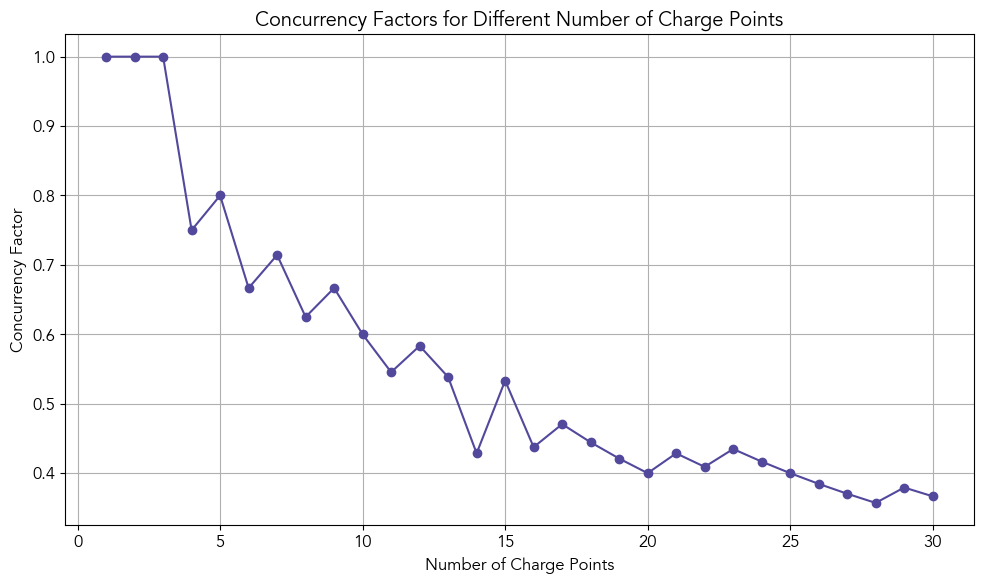

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(num_chargepoints=20, intervals=35040, charging_speed=11, km_to_kwh_conversion=0.18, arrival_probabilities_per_hour=None, charging_demands_km=None, charging_probabilities=None):
    # Default values for arrival probabilities if not changed
    if arrival_probabilities_per_hour is None:
        arrival_probabilities_per_hour = np.array([
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0283, 0.0283, 0.0566, 0.0566,
            0.0566, 0.0755, 0.0755, 0.0755,
            0.1038, 0.1038, 0.1038, 0.0472,
            0.0472, 0.0472, 0.0094, 0.0094
        ])

    # Default values for charging demands and probabilities if not changed
    if charging_demands_km is None:
        charging_demands_km = np.array([0, 5, 10, 20, 30, 50, 100, 200, 300])
    
    # Set default values for charging probabilities if not provided
    if charging_probabilities is None:
        charging_probabilities = np.array([0.3431, 0.049, 0.098, 0.1176, 0.0882, 0.1176, 0.1078, 0.049, 0.0294])

    # Expand hourly probabilities to 15-minute intervals
    arrival_probabilities = np.repeat(arrival_probabilities_per_hour, 4)

    # Normalize charging probabilities if they do not sum to exactly 1
    if not np.isclose(np.sum(charging_probabilities), 1):
        charging_probabilities = charging_probabilities / np.sum(charging_probabilities)

    # Convert charging demands from km to kWh
    charging_demands_kwh = charging_demands_km * km_to_kwh_conversion

    # Initialize values
    chargepoints, power_demand, energy_consumed, actual_max_power_demand = np.zeros(num_chargepoints), np.zeros(intervals), 0, 0

    # Simulation loop to iterate through each interval
    for interval in range(intervals):
        interval_in_day = interval % 96

        for charger in range(num_chargepoints):
            if chargepoints[charger] == 0:  # Charger is free
                if np.random.rand() < arrival_probabilities[interval_in_day]:  # Check if an EV arrives
                    energy_need_kwh = np.random.choice(charging_demands_kwh, p=charging_probabilities)  # Determine energy need
                    charging_time = int(energy_need_kwh / charging_speed) * 4  # Convert hours to 15-minute intervals
                    chargepoints[charger] = charging_time

            if chargepoints[charger] > 0:
                # Charger is occupied
                power_demand[interval] += charging_speed
                chargepoints[charger] -= 1

        # Update actual max power demand
        actual_max_power_demand = max(actual_max_power_demand, power_demand[interval])
        # Accumulate total energy
        energy_consumed += power_demand[interval] * (15 / 60)  # Convert power to energy

    # Calculate results
    total_energy_consumed_kwh = energy_consumed
    concurrency_factor = actual_max_power_demand / (num_chargepoints * charging_speed)

    return {
        "total_energy_consumed_kwh": total_energy_consumed_kwh,
        "theoretical_max_power_demand_kw": num_chargepoints * charging_speed,
        "actual_max_power_demand_kw": actual_max_power_demand,
        "concurrency_factor": concurrency_factor
    }

if __name__ == '__main__':
    # Run the simulation for different numbers of charge points and collect concurrency factors
    chargepoints_range = range(1, 31)
    concurrency_factors = [run_simulation(num_chargepoints=cp)["concurrency_factor"] for cp in chargepoints_range]

    # Setting the font and font size
    plt.rcParams['font.family'] = 'Avenir'
    plt.rcParams['font.size'] = 12

    # Plot the concurrency factors
    plt.figure(figsize=(10, 6))
    plt.plot(chargepoints_range, concurrency_factors, marker='o', linestyle='-', color='#52489C')
    plt.title('Concurrency Factors for Different Number of Charge Points')
    plt.xlabel('Number of Charge Points')
    plt.ylabel('Concurrency Factor')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### Why does the concurrency factor behave like this?

### When there is a small amount of charge points the concurrency factor would be quite high. In essence this is due to the fact concurrency factor is the ratio between the actual power demand and the theoretical power demand. At low values this is almost guranteed to be identical, however as the amount of charge points increases there is a decrease in the Actual Maximum Power demand, leading to a lowering in the the concurrency factor since there is an increase in the amount of idle chargepoints.

### Bonus 2: If you consider the impact of DST vs. mapping the hours to the 15 minute ticks.

In [16]:
import numpy as np

def run_simulation(num_chargepoints=20, intervals=35040, charging_speed=11, km_to_kwh_conversion=0.18, arrival_probabilities_per_hour=None, charging_demands_km=None, charging_probabilities=None, apply_dst=False):
    # Default values for arrival probabilities if not changed
    if arrival_probabilities_per_hour is None:
        arrival_probabilities_per_hour = np.array([
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0283, 0.0283, 0.0566, 0.0566,
            0.0566, 0.0755, 0.0755, 0.0755,
            0.1038, 0.1038, 0.1038, 0.0472,
            0.0472, 0.0472, 0.0094, 0.0094
        ])

    # Default values for charging demands and probabilities if not changed
    if charging_demands_km is None:
        charging_demands_km = np.array([0, 5, 10, 20, 30, 50, 100, 200, 300])
    
    # Set default values for charging probabilities if not provided
    if charging_probabilities is None:
        charging_probabilities = np.array([0.3431, 0.049, 0.098, 0.1176, 0.0882, 0.1176, 0.1078, 0.049, 0.0294])

    # Expand hourly probabilities to 15-minute intervals
    arrival_probabilities = np.repeat(arrival_probabilities_per_hour, 4)

    # Normalize charging probabilities if they do not sum to exactly 1
    if not np.isclose(np.sum(charging_probabilities), 1):
        charging_probabilities = charging_probabilities / np.sum(charging_probabilities)

    # Convert charging demands from km to kWh
    charging_demands_kwh = charging_demands_km * km_to_kwh_conversion

    # Initialize values
    chargepoints, power_demand, energy_consumed, actual_max_power_demand = np.zeros(num_chargepoints), np.zeros(intervals), 0, 0

    # Simulation loop to iterate through each interval
    interval_count = 0
    while interval_count < intervals:
        day = interval_count // 96
        interval_in_day = interval_count % 96
        
        # DST adjustment
        if apply_dst:
            if day == 70 and interval_in_day == 8 * 4:  # Spring forward on day 70 at 2:00 AM which is March 10th -> Note: I am considering DST for Canada and the United States. I am not sure if it is different in Europe
                interval_count += 4
                continue
            if day == 308 and interval_in_day == 8 * 4:  # Fall back on day 300 at 2:00 AM which is November 3rd -> Note: I am considering DST for Canada and the United States. I am not sure if it is different in Europe
                interval_in_day -= 4
        
        for charger in range(num_chargepoints):
            if chargepoints[charger] == 0:  # Charger is free
                if np.random.rand() < arrival_probabilities[interval_in_day]:  # Check if an EV arrives
                    energy_need_kwh = np.random.choice(charging_demands_kwh, p=charging_probabilities)  # Determine energy need
                    charging_time = int(energy_need_kwh / charging_speed) * 4  # Convert hours to 15-minute intervals
                    chargepoints[charger] = charging_time

            if chargepoints[charger] > 0:
                # Charger is occupied
                power_demand[interval_count] += charging_speed
                chargepoints[charger] -= 1

        # Update actual max power demand
        actual_max_power_demand = max(actual_max_power_demand, power_demand[interval_count])
        # Accumulate total energy
        energy_consumed += power_demand[interval_count] * (15 / 60)  # Convert power to energy
        
        interval_count += 1

    # Calculate results
    total_energy_consumed_kwh = energy_consumed
    concurrency_factor = actual_max_power_demand / (num_chargepoints * charging_speed)

    return {
        "total_energy_consumed_kwh": total_energy_consumed_kwh,
        "theoretical_max_power_demand_kw": num_chargepoints * charging_speed,
        "actual_max_power_demand_kw": actual_max_power_demand,
        "concurrency_factor": concurrency_factor
    }

if __name__ == '__main__':
    # Run simulation with DST and without DST
    results_without_dst = run_simulation()
    results_with_dst = run_simulation(apply_dst=True)

    print("Results without DST:")
    print("Total Energy Consumed (kWh):", results_without_dst["total_energy_consumed_kwh"])
    print("Theoretical Maximum Power Demand (kW):", results_without_dst["theoretical_max_power_demand_kw"])
    print("Actual Maximum Power Demand (kW):", results_without_dst["actual_max_power_demand_kw"])
    print("Concurrency Factor:", results_without_dst["concurrency_factor"])

    print("\nResults with DST:")
    print("Total Energy Consumed (kWh):", results_with_dst["total_energy_consumed_kwh"])
    print("Theoretical Maximum Power Demand (kW):", results_with_dst["theoretical_max_power_demand_kw"])
    print("Actual Maximum Power Demand (kW):", results_with_dst["actual_max_power_demand_kw"])
    print("Concurrency Factor:", results_with_dst["concurrency_factor"])


Results without DST:
Total Energy Consumed (kWh): 109813.0
Theoretical Maximum Power Demand (kW): 220
Actual Maximum Power Demand (kW): 99.0
Concurrency Factor: 0.45

Results with DST:
Total Energy Consumed (kWh): 111925.0
Theoretical Maximum Power Demand (kW): 220
Actual Maximum Power Demand (kW): 99.0
Concurrency Factor: 0.45


### Bonus 3: If you seed the probabilities vs. using random() for random-but-deterministic results.

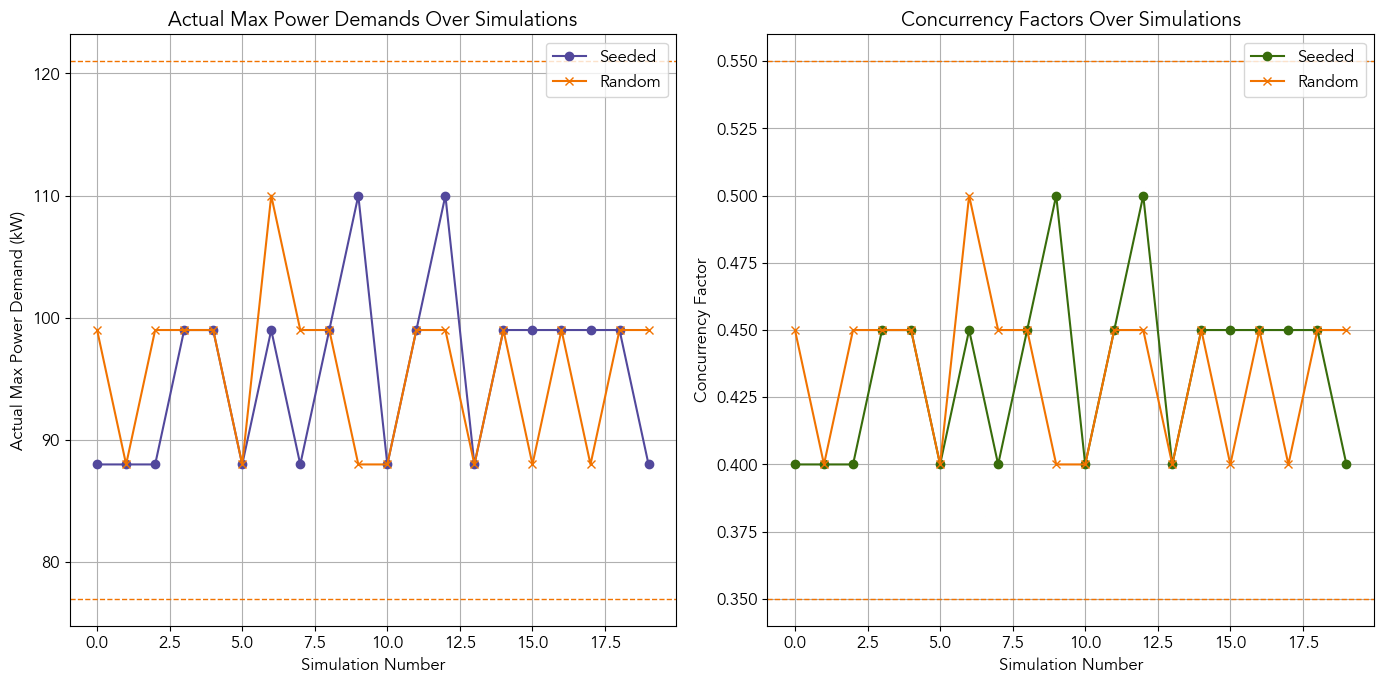

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(seed=None, num_chargepoints=20, intervals=35040, charging_speed=11, km_to_kwh_conversion=0.18, arrival_probabilities_per_hour=None, charging_demands_km=None, charging_probabilities=None):
    if seed is not None:
        np.random.seed(seed)  # Set the seed

    # Default values for arrival probabilities if not changed
    if arrival_probabilities_per_hour is None:
        arrival_probabilities_per_hour = np.array([
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0094, 0.0094, 0.0094, 0.0094,
            0.0283, 0.0283, 0.0566, 0.0566,
            0.0566, 0.0755, 0.0755, 0.0755,
            0.1038, 0.1038, 0.1038, 0.0472,
            0.0472, 0.0472, 0.0094, 0.0094
        ])

    # Default values for charging demands and probabilities if not changed
    if charging_demands_km is None:
        charging_demands_km = np.array([0, 5, 10, 20, 30, 50, 100, 200, 300])
    
    # Set default values for charging probabilities if not provided
    if charging_probabilities is None:
        charging_probabilities = np.array([0.3431, 0.049, 0.098, 0.1176, 0.0882, 0.1176, 0.1078, 0.049, 0.0294])

    # Expand hourly probabilities to 15-minute intervals
    arrival_probabilities = np.repeat(arrival_probabilities_per_hour, 4)

    # Normalize charging probabilities if they do not sum to exactly 1
    if not np.isclose(np.sum(charging_probabilities), 1):
        charging_probabilities = charging_probabilities / np.sum(charging_probabilities)

    # Convert charging demands from km to kWh
    charging_demands_kwh = charging_demands_km * km_to_kwh_conversion

    # Initialize values
    chargepoints, power_demand, energy_consumed, actual_max_power_demand = np.zeros(num_chargepoints), np.zeros(intervals), 0, 0

    # Simulation loop to iterate through each interval
    for interval in range(intervals):
        interval_in_day = interval % 96

        for charger in range(num_chargepoints):
            if chargepoints[charger] == 0:  # Charger is free
                if np.random.rand() < arrival_probabilities[interval_in_day]:  # Check if an EV arrives
                    energy_need_kwh = np.random.choice(charging_demands_kwh, p=charging_probabilities)  # Determine energy need
                    charging_time = int(energy_need_kwh / charging_speed) * 4  # Convert hours to 15-minute intervals
                    chargepoints[charger] = charging_time

            if chargepoints[charger] > 0:
                # Charger is occupied
                power_demand[interval] += charging_speed
                chargepoints[charger] -= 1

        # Update actual max power demand
        actual_max_power_demand = max(actual_max_power_demand, power_demand[interval])
        # Accumulate total energy
        energy_consumed += power_demand[interval] * (15 / 60)  # Convert power to energy

    # Calculate results
    total_energy_consumed_kwh = energy_consumed
    concurrency_factor = actual_max_power_demand / (num_chargepoints * charging_speed)

    return {
        "total_energy_consumed_kwh": total_energy_consumed_kwh,
        "theoretical_max_power_demand_kw": num_chargepoints * charging_speed,
        "actual_max_power_demand_kw": actual_max_power_demand,
        "concurrency_factor": concurrency_factor
    }

# Function to run multiple simulations with and without varying seed
def run_multiple_simulations(base_seed=None, num_simulations=20):
    results = []
    for i in range(num_simulations):
        seed = base_seed + i if base_seed is not None else None # Changing seed to introduce variance
        result = run_simulation(seed=seed, num_chargepoints=20, intervals=35040, charging_speed=11)
        results.append(result)
    actual_max_power_demands = [result['actual_max_power_demand_kw'] for result in results]
    concurrency_factors = [result['concurrency_factor'] for result in results]
    return actual_max_power_demands, concurrency_factors

# Running the simulation multiple times and collect resuts
num_simulations = 20
base_seed = 42  # Base seed
actual_max_power_demands_seeded, concurrency_factors_seeded = run_multiple_simulations(base_seed=base_seed, num_simulations=num_simulations)  # Run simulations with varying seed
actual_max_power_demands_random, concurrency_factors_random = run_multiple_simulations(base_seed=None, num_simulations=num_simulations)  # Run simulations without seed

# Setting the font and font size
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 12

# Plot the results
plt.figure(figsize=(14, 7))

# Plot for Actual Max Power Demands
plt.subplot(1, 2, 1)
plt.plot(range(num_simulations), actual_max_power_demands_seeded, marker='o', linestyle='-', color='#52489C', label='Seeded')
plt.plot(range(num_simulations), actual_max_power_demands_random, marker='x', linestyle='-', color='#F17300', label='Random')
plt.axhline(77, color='#F17300', linestyle='dashed', linewidth=1)
plt.axhline(121, color='#F17300', linestyle='dashed', linewidth=1)
plt.title('Actual Max Power Demands Over Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('Actual Max Power Demand (kW)')
plt.legend()
plt.grid(True)

# Plot for Concurrency Factors
plt.subplot(1, 2, 2)
plt.plot(range(num_simulations), concurrency_factors_seeded, marker='o', linestyle='-', color='#386C0B', label='Seeded')
plt.plot(range(num_simulations), concurrency_factors_random, marker='x', linestyle='-', color='#F17300', label='Random')
plt.axhline(0.35, color='#F17300', linestyle='dashed', linewidth=1)
plt.axhline(0.55, color='#F17300', linestyle='dashed', linewidth=1)
plt.title('Concurrency Factors Over Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('Concurrency Factor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Note: I made sure to vary the seed through each iteration. Otherwise there would be only a straight line for the seeded values with no change. This makes sense since an unchanging seed would yield the same "random" behaviour. I figured I would add this note here just incase that is in fact what you were looking for.